# **Machine Learning**
## *Lab 05*

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv("combined_seismic_data.csv")
dataset = dataset.dropna()

def create_intensity_classes(df):
    # Define thresholds based on percentiles or domain knowledge
    low_threshold = df['max'].quantile(0.33)
    high_threshold = df['max'].quantile(0.66)
    
    # Create class labels
    conditions = [
        (df['max'] < low_threshold),
        (df['max'] >= low_threshold) & (df['max'] < high_threshold),
        (df['max'] >= high_threshold)
    ]
    class_labels = [0, 1, 2]  # or ['Low', 'Medium', 'High']
    
    return np.select(conditions, class_labels)
data = dataset.copy()
data = data[['max', 'distance_to_event']]
data["class"] = create_intensity_classes(data)

### A1

In [31]:
data = dataset.copy()
correlation = data[['mean', 'std', 'max', 'peak_to_peak', 'dominant_freq', 'spectral_centroid', 'energy', 'distance_to_event']].corr()
print(correlation)

X = data[['dominant_freq']]
y = data[['spectral_centroid']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

                       mean       std       max  peak_to_peak  dominant_freq  \
mean               1.000000  0.070754  0.056970      0.064175      -0.001262   
std                0.070754  1.000000  0.976841      0.980652      -0.065901   
max                0.056970  0.976841  1.000000      0.997519      -0.070847   
peak_to_peak       0.064175  0.980652  0.997519      1.000000      -0.068938   
dominant_freq     -0.001262 -0.065901 -0.070847     -0.068938       1.000000   
spectral_centroid -0.004326 -0.134713 -0.144536     -0.140476       0.693805   
energy             0.046564  0.913100  0.844319      0.854345      -0.033586   
distance_to_event  0.004177  0.013537 -0.024954     -0.029794      -0.137173   

                   spectral_centroid    energy  distance_to_event  
mean                       -0.004326  0.046564           0.004177  
std                        -0.134713  0.913100           0.013537  
max                        -0.144536  0.844319          -0.024954  
peak_to

LinearRegression()

### A2

In [32]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 score: {r2}")

MSE: 5.7301787871702174
RMSE: 2.39377918513179
MAPE: 1.2670850383386807
R2 score: 0.20624399832822582


### A3

In [33]:

X = data[['max', 'peak_to_peak', 'dominant_freq']]
y = data['spectral_centroid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 score: {r2}")

MSE: 5.879887383364424
RMSE: 2.424847909326361
MAPE: 1.3479722661973534
R2 score: 0.207095574268232


### A4

In [34]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster centers:\n", centers)

Cluster centers:
 [[2.70552905e+07 5.11041906e+07 3.90625000e-01]
 [1.23980766e+06 2.20719652e+06 9.00474502e-01]]


### A5

In [35]:
silhouette_score = silhouette_score(X_train, labels)
ch_score = calinski_harabasz_score(X_train, labels)
db_index = davies_bouldin_score(X_train, labels)

print("Silhouette ccore:", silhouette_score)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_index)

Silhouette ccore: 0.9080276556624347
Calinski-Harabasz Score: 2259.317569027737
Davies-Bouldin Index: 0.35913670099388256


### A6

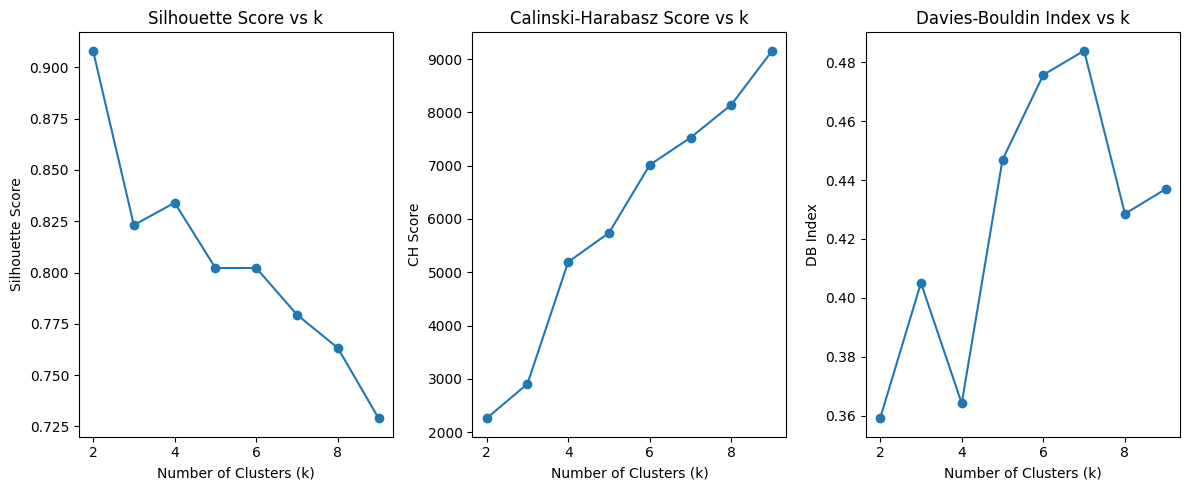

In [41]:
k_values = range(2, 10)
silhouette_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CH Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

### A7

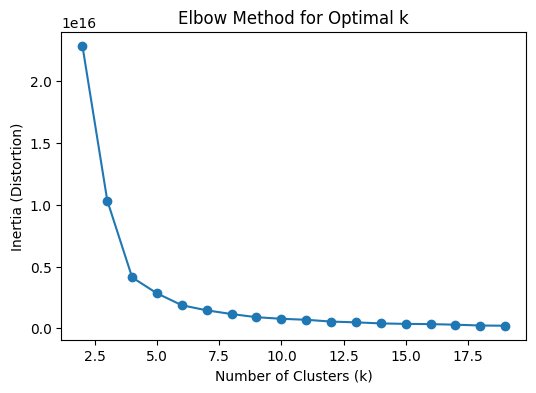

In [42]:
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 20), distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.show()